# Imports

In [22]:
import pandas as pd
import string
from matplotlib import pyplot as plt
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Data Reading

In [23]:
data_frame = pd.read_csv("../Dataset/articles.csv")
data_frame.head()

# data_frame = data_frame.head(100)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


# Data Cleaning
## 1- Handel Missing values
### a- Handel columns with missing values

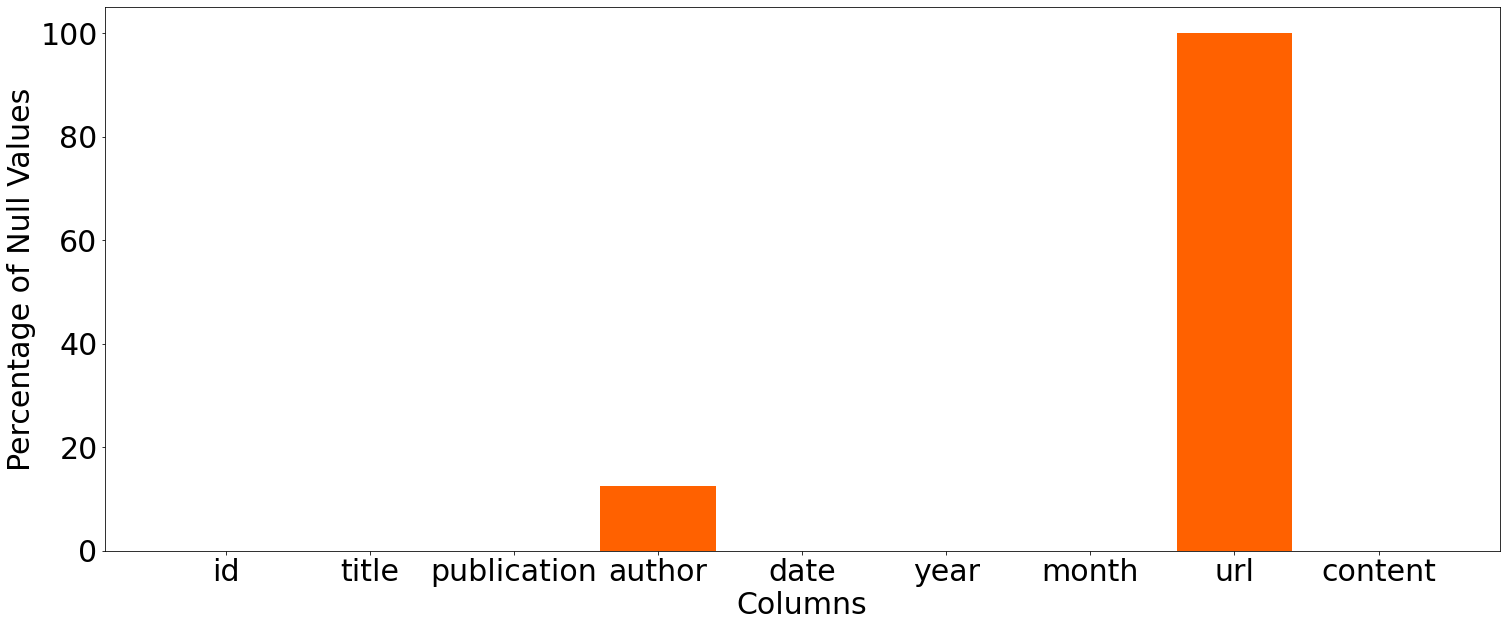

Unnamed: 0       0.000
id               0.000
title            0.000
publication      0.000
author          12.612
date             0.000
year             0.000
month            0.000
url            100.000
content          0.000
dtype: float64


In [77]:
# Get total number of nulls in each column
labels = data_frame.columns.tolist()
labels.pop(0)

data = (data_frame.isnull().sum() / len(data_frame) * 100).tolist()
data.pop(0)
# Creating plot
fig = plt.figure(figsize =(25, 10))
plt.bar(labels,data, color = "#FF6100")
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.show()
print(data_frame.isnull().sum() / len(data_frame) * 100)

In [4]:
# Remove url column because it's empty(100% null values)
data_frame.drop(columns=['url'], inplace=True)
data_frame.isnull().sum() / len(data_frame) * 100

Unnamed: 0      0.000
id              0.000
title           0.000
publication     0.000
author         12.612
date            0.000
year            0.000
month           0.000
content         0.000
dtype: float64

### b- Handel rows with missing values

In [5]:
# Get percentage of number of rows contain missing values
mask = data_frame.isnull().any(axis=1)
rows_with_missing_values = mask.sum() / len(data_frame)*100
print("Number of rows contain null values =", rows_with_missing_values, "%")

Number of rows contain null values = 12.612000000000002 %


In [6]:
# Drop rows contain null values
data_frame.dropna(inplace=True)
data_frame.isnull().sum() / len(data_frame) * 100

Unnamed: 0     0.0
id             0.0
title          0.0
publication    0.0
author         0.0
date           0.0
year           0.0
month          0.0
content        0.0
dtype: float64

## 2- Handel columns data types

In [7]:
data_frame.dtypes

Unnamed: 0       int64
id               int64
title           object
publication     object
author          object
date            object
year           float64
month          float64
content         object
dtype: object

In [8]:
data_frame= data_frame.astype({"title": "string",
                               "publication": "string",
                               "author": "string",
                               "date": "datetime64",
                               "year": "int64",
                               "month": "int64",
                               "content": "string"})

data_frame.dtypes

Unnamed: 0              int64
id                      int64
title                  string
publication            string
author                 string
date           datetime64[ns]
year                    int64
month                   int64
content                string
dtype: object

## 3- Dealing with unnecessary columns

In [9]:
# Drop id column because it contain unnecessary unique values
data_frame.drop(columns=['id'], inplace=True)
data_frame.head()

,Unnamed: 0,title,publication,author,date,year,month,content
0,0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...
1,1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017,6,"After the bullet shells get counted, the blood..."
2,2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017,1,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017,4,"Death may be the great equalizer, but it isn’t..."
4,4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017,1,"SEOUL, South Korea — North Korea’s leader, ..."


In [10]:
# extract day from date column and rename column to day
data_frame['date'] = data_frame['date'].astype('string')
data_frame['date'] = data_frame['date'].str.replace("-", "/")
data_frame[["year", "month", "day"]] = data_frame["date"].str.split("/", expand = True)
data_frame['date'] = data_frame['day']
data_frame.drop(columns=["day"], inplace=True)
data_frame.rename(columns={"date": "day"}, inplace=True)
data_frame.head()

,Unnamed: 0,title,publication,author,day,year,month,content
0,0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,31,2016,12,WASHINGTON — Congressional Republicans have...
1,1,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,19,2017,06,"After the bullet shells get counted, the blood..."
2,2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,06,2017,01,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,10,2017,04,"Death may be the great equalizer, but it isn’t..."
4,4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,02,2017,01,"SEOUL, South Korea — North Korea’s leader, ..."


# Text Preprocessing NLP Pipeline
## 1- Convert to lowercase

In [11]:
columns = ["title", "publication", "author", "content"]
for column in columns:
    data_frame[column] = data_frame[column].str.lower()

data_frame.head()

,Unnamed: 0,title,publication,author,day,year,month,content
0,0,house republicans fret about winning their hea...,new york times,carl hulse,31,2016,12,washington — congressional republicans have...
1,1,rift between officers and residents as killing...,new york times,benjamin mueller and al baker,19,2017,06,"after the bullet shells get counted, the blood..."
2,2,"tyrus wong, ‘bambi’ artist thwarted by racial ...",new york times,margalit fox,06,2017,01,"when walt disney’s “bambi” opened in 1942, cri..."
3,3,"among deaths in 2016, a heavy toll in pop musi...",new york times,william mcdonald,10,2017,04,"death may be the great equalizer, but it isn’t..."
4,4,kim jong-un says north korea is preparing to t...,new york times,choe sang-hun,02,2017,01,"seoul, south korea — north korea’s leader, ..."


## 2- Remove HTML Tags

In [12]:
def remove_HTML_tags(text):
    return re.sub(r'<.*?>', "", text)

columns = ["title", "author", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_HTML_tags(x))

## 3- Remove URLs

In [13]:
def remove_URLs(text):
    return re.sub(r'https?://\S+www\.\S+', "", text)

columns = ["title", "author", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_URLs(x))

## 4- Remove Punctuations

In [ ]:
punctuation = string.punctuation
def remove_punctuations(text):
    return text.translate(str.maketrans("", "", punctuation))

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_punctuations(x))

## 5- Remove Special Characters

In [14]:
columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].str.replace('[^a-zA-Z0-9]', " ", regex=True)

data_frame[['title', 'content']]

,title,content
0,house republicans fret about winning their hea...,washington congressional republicans have...
1,rift between officers and residents as killing...,after the bullet shells get counted the blood...
2,tyrus wong bambi artist thwarted by racial ...,when walt disney s bambi opened in 1942 cri...
3,among deaths in 2016 a heavy toll in pop musi...,death may be the great equalizer but it isn t...
4,kim jong un says north korea is preparing to t...,seoul south korea north korea s leader ...
...,...,...
49995,rex tillerson says climate change is real but,as chairman and ceo of exxonmobil rex tillers...
49996,the biggest intelligence questions raised by t...,i ve spent nearly 20 years looking at intellig...
49997,trump announces plan that does little to resol...,donald trump will not be taking necessary st...
49998,dozens of for profit colleges could soon close,dozens of colleges could be forced to close ...


## 6- Remove unnecessary spaces and words

In [15]:
# remove unnecessary spaces
columns = ["title", "author", "content"]
for column in columns:
    data_frame[column] = data_frame[column].str.replace('\s\s+', " ", regex=True)

data_frame[['title', 'content']]

,title,content
0,house republicans fret about winning their hea...,washington congressional republicans have a ne...
1,rift between officers and residents as killing...,after the bullet shells get counted the blood ...
2,tyrus wong bambi artist thwarted by racial bia...,when walt disney s bambi opened in 1942 critic...
3,among deaths in 2016 a heavy toll in pop music...,death may be the great equalizer but it isn t ...
4,kim jong un says north korea is preparing to t...,seoul south korea north korea s leader kim sai...
...,...,...
49995,rex tillerson says climate change is real but,as chairman and ceo of exxonmobil rex tillerso...
49996,the biggest intelligence questions raised by t...,i ve spent nearly 20 years looking at intellig...
49997,trump announces plan that does little to resol...,donald trump will not be taking necessary ste...
49998,dozens of for profit colleges could soon close,dozens of colleges could be forced to close in...


In [16]:
# remove unnecessary words
# remove publication from title
publication_unique_values = data_frame["publication"].unique()
for publication in publication_unique_values:
    data_frame["title"] = data_frame['title'].str.replace("." + publication + "$", "", regex=True)

data_frame.head()

,Unnamed: 0,title,publication,author,day,year,month,content
0,0,house republicans fret about winning their hea...,new york times,carl hulse,31,2016,12,washington congressional republicans have a ne...
1,1,rift between officers and residents as killing...,new york times,benjamin mueller and al baker,19,2017,06,after the bullet shells get counted the blood ...
2,2,tyrus wong bambi artist thwarted by racial bia...,new york times,margalit fox,06,2017,01,when walt disney s bambi opened in 1942 critic...
3,3,among deaths in 2016 a heavy toll in pop music...,new york times,william mcdonald,10,2017,04,death may be the great equalizer but it isn t ...
4,4,kim jong un says north korea is preparing to t...,new york times,choe sang-hun,02,2017,01,seoul south korea north korea s leader kim sai...


## 7- Apply Tokenization
### a- Apply sentence tokenization

In [17]:
# def sentence_tokenizer(text):
#     return sent_tokenize(text)
#
# columns = ["title", "content"]
# for column in columns:
#     data_frame[column] = data_frame[column].apply(lambda x: sentence_tokenizer(x))
#
# data_frame[['title', 'content']]

### b- Apply word tokenization

In [18]:
# def word_tokenizer(sentences):
#     tokenized_words = []
#     for x in sentences:
#         tokenized_words = tokenized_words + word_tokenize(x)
#     return tokenized_words

def word_tokenizer(text):
    return word_tokenize(text)
columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: word_tokenizer(x))

data_frame.head()

,Unnamed: 0,title,publication,author,day,year,month,content
0,0,"[house, republicans, fret, about, winning, the...",new york times,carl hulse,31,2016,12,"[washington, congressional, republicans, have,..."
1,1,"[rift, between, officers, and, residents, as, ...",new york times,benjamin mueller and al baker,19,2017,06,"[after, the, bullet, shells, get, counted, the..."
2,2,"[tyrus, wong, bambi, artist, thwarted, by, rac...",new york times,margalit fox,06,2017,01,"[when, walt, disney, s, bambi, opened, in, 194..."
3,3,"[among, deaths, in, 2016, a, heavy, toll, in, ...",new york times,william mcdonald,10,2017,04,"[death, may, be, the, great, equalizer, but, i..."
4,4,"[kim, jong, un, says, north, korea, is, prepar...",new york times,choe sang-hun,02,2017,01,"[seoul, south, korea, north, korea, s, leader,..."


## 8- Remove Stop Words

In [19]:
STOPWORDS = set(stopwords.words("english"))
def remove_stop_words(text):
    return [word for word in text if word not in STOPWORDS]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_stop_words(x))

data_frame.head()

,Unnamed: 0,title,publication,author,day,year,month,content
0,0,"[house, republicans, fret, winning, health, ca...",new york times,carl hulse,31,2016,12,"[washington, congressional, republicans, new, ..."
1,1,"[rift, officers, residents, killings, persist,...",new york times,benjamin mueller and al baker,19,2017,06,"[bullet, shells, get, counted, blood, dries, v..."
2,2,"[tyrus, wong, bambi, artist, thwarted, racial,...",new york times,margalit fox,06,2017,01,"[walt, disney, bambi, opened, 1942, critics, p..."
3,3,"[among, deaths, 2016, heavy, toll, pop, music]",new york times,william mcdonald,10,2017,04,"[death, may, great, equalizer, necessarily, ev..."
4,4,"[kim, jong, un, says, north, korea, preparing,...",new york times,choe sang-hun,02,2017,01,"[seoul, south, korea, north, korea, leader, ki..."


## 9- Remove frequently words

In [20]:
word_counter_title = Counter()
word_counter_content = Counter()
def get_most_frequently_words(column_name, word_counter):
    for text in data_frame[column_name]:
        for word in text:
            word_counter[word] += 1
    return word_counter

# get the most common frequently words in [title] more than 1000
word_frequency_title = get_most_frequently_words("title", word_counter_title).most_common(10)

# get the most common frequently words in [content]
word_frequency_content = get_most_frequently_words("content", word_counter_content).most_common(10)

In [21]:
FREQUENT_WORDS_TITLE = set(word for (word, word_count) in get_most_frequently_words("title", word_counter_title).most_common(10))
FREQUENT_WORDS_CONTENT = set(word for (word, word_count) in get_most_frequently_words("content", word_counter_content).most_common(10))

def remove_frequent_words(string_text, frequent_words):
    return [word for word in string_text if word not in frequent_words]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_frequent_words(x, FREQUENT_WORDS_TITLE))

data_frame.head()

,Unnamed: 0,title,publication,author,day,year,month,content
0,0,"[house, republicans, fret, winning, health, ca...",new york times,carl hulse,31,2016,12,"[washington, congressional, republicans, fear,..."
1,1,"[rift, officers, residents, killings, persist,...",new york times,benjamin mueller and al baker,19,2017,06,"[bullet, shells, get, counted, blood, dries, v..."
2,2,"[tyrus, wong, bambi, artist, thwarted, racial,...",new york times,margalit fox,06,2017,01,"[walt, disney, bambi, opened, 1942, critics, p..."
3,3,"[among, deaths, 2016, heavy, toll, pop, music]",new york times,william mcdonald,10,2017,04,"[death, may, great, equalizer, necessarily, ev..."
4,4,"[kim, jong, un, north, korea, preparing, test,...",new york times,choe sang-hun,02,2017,01,"[seoul, south, korea, north, korea, leader, ki..."


## 10- Remove rare words

In [22]:
RARE_WORDS_TITLE = set(word for (word, word_count) in get_most_frequently_words("title", word_counter_title).most_common()[:-10:-1])
RARE_WORDS_CONTENT = set(word for (word, word_count) in get_most_frequently_words("content", word_counter_content).most_common()[:-10:-1])

def remove_rare_words(string_text, rare_words):
    return [word for word in string_text if word not in rare_words]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: remove_rare_words(x, RARE_WORDS_TITLE))

data_frame.head()

,Unnamed: 0,title,publication,author,day,year,month,content
0,0,"[house, republicans, fret, winning, health, ca...",new york times,carl hulse,31,2016,12,"[washington, congressional, republicans, fear,..."
1,1,"[rift, officers, residents, killings, persist,...",new york times,benjamin mueller and al baker,19,2017,06,"[bullet, shells, get, counted, blood, dries, v..."
2,2,"[tyrus, wong, bambi, artist, thwarted, racial,...",new york times,margalit fox,06,2017,01,"[walt, disney, bambi, opened, 1942, critics, p..."
3,3,"[among, deaths, 2016, heavy, toll, pop, music]",new york times,william mcdonald,10,2017,04,"[death, may, great, equalizer, necessarily, ev..."
4,4,"[kim, jong, un, north, korea, preparing, test,...",new york times,choe sang-hun,02,2017,01,"[seoul, south, korea, north, korea, leader, ki..."


## 11- Apply Stemming

In [23]:
porter_stemmer_title = PorterStemmer()
porter_stemmer_content = PorterStemmer()
def stemming_words(text, porter_stemmer):
    return [porter_stemmer.stem(word) for word in text]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: stemming_words(x, porter_stemmer_title))

data_frame.head()

,Unnamed: 0,title,publication,author,day,year,month,content
0,0,"[hous, republican, fret, win, health, care, suit]",new york times,carl hulse,31,2016,12,"[washington, congression, republican, fear, co..."
1,1,"[rift, offic, resid, kill, persist, south, bronx]",new york times,benjamin mueller and al baker,19,2017,06,"[bullet, shell, get, count, blood, dri, votiv,..."
2,2,"[tyru, wong, bambi, artist, thwart, racial, bi...",new york times,margalit fox,06,2017,01,"[walt, disney, bambi, open, 1942, critic, prai..."
3,3,"[among, death, 2016, heavi, toll, pop, music]",new york times,william mcdonald,10,2017,04,"[death, may, great, equal, necessarili, evenha..."
4,4,"[kim, jong, un, north, korea, prepar, test, lo...",new york times,choe sang-hun,02,2017,01,"[seoul, south, korea, north, korea, leader, ki..."


## 12- Apply POS and Lemmatization

In [ ]:
lemmatizer_title = WordNetLemmatizer()
lemmatizer_content = WordNetLemmatizer()
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words(text, lemmatizer):
    # apply POS tagging
    pos_text = pos_tag(text)
    return [lemmatizer.lemmatize(word, wordnet_map.get(pos[0],  wordnet.NOUN)) for word, pos in pos_text]

columns = ["title", "content"]
for column in columns:
    data_frame[column] = data_frame[column].apply(lambda x: lemmatize_words(x, lemmatizer_title))

# Data Preprocessing
## 1- Dealing with categorical data (Nominal Data)
### a- Preprocess [ publication ]

In [ ]:
# get number of unique values in publication column
publication_unique_values = data_frame["publication"].unique()
print("Publication unique values = ", len(publication_unique_values))

In [ ]:
# apply one hot encoding in publication column
data_frame = pd.get_dummies(data=data_frame, columns=["publication"])
data_frame.dtypes

### b- Preprocess [ author ]

In [ ]:
# clean author
def clean_author(text):
    output = re.sub(r'[a-z]{1}\.|\(.*\)', "", text) # remove single character in beginning and end of string
    output = text.strip() # remove spaces after and before string
    output = " ".join(output.split()) # remove extra spaces between words
    output = re.sub(r'^.\s|\s.$', "", output) # remove single character in beginning and end of string
    return output

In [ ]:
#remove any character followed by dot(.) and any brackets contain words
data_frame["author"] = data_frame["author"].str.replace('[a-z]{1}\.|\(.*\)', " ", regex=True)

# get number of unique values in author column and it's frequency
author_unique_values = Counter()
for text in data_frame["author"]:
    for author_name in re.split('with|and|,|&', text):

        name = author_name.strip() # remove spaces after and before string
        name = " ".join(name.split()) # remove extra spaces between words
        name = re.sub(r'^.\s|\s.$', "", name) # remove single character in beginning and end of string

        if len(name) > 1:
            author_unique_values[name] += 1

print("Author unique values = ", len(author_unique_values))

In [ ]:
def split_authors(text):
    return ','.join([word.strip() for word in re.split('with|and|,|&', text)])

data_frame["author"] = data_frame["author"].apply(lambda x: split_authors(x))

In [ ]:
# # apply mapping in author
# mapping_author = {}
# for index, author in enumerate(list(author_unique_values.keys())):
#     mapping_author[author] = index
# """
# write code here if cell contain more than one author get author with minimum frequency
# """
# # data_frame = data_frame.replace ({
# #     "author": mapping_author
# # })
# data_frame.head()
# data_frame["author"]

# Feature Extraction
## ⚫ Apply TF-IDF

In [ ]:
data_frame['content'] = data_frame["content"].apply(lambda x: " ".join(x))
# Split the content column into training and testing sets
X_train, X_test = train_test_split(data_frame['content'], test_size=0.2, random_state=42)

# Define a TfidfVectorizer to convert the text data into a numerical representation
TF_IDF = TfidfVectorizer(stop_words='english')

# Convert the training data into numerical representations
TF_IDF_features_train = TF_IDF.fit_transform(X_train)

# Perform k-means clustering on the training data
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(TF_IDF_features_train)

# Convert the testing data into numerical representations
TF_IDF_features_test = TF_IDF.transform(X_test)

# Predict the clusters for the testing data
y_pred = km.predict(TF_IDF_features_test)

# Print the top terms in each cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = TF_IDF.get_feature_names()
for i in range(num_clusters):
    print(f"Cluster {i+1}:")
    for j in order_centroids[i, :10]:
        print(f"  {terms[j]}")



In [ ]:
# TF_IDF = TfidfVectorizer(stop_words='english')
#
# # fit data
# TF_IDF.fit(data_frame["title"])